In [1]:
# Install if not present
# !pip install pandas numpy matplotlib seaborn plotly scikit-learn

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score


In [2]:
# If uploaded manually in Colab left pane
file_path = '/content/electric_vehicles_spec_2025.csv.csv'

df = pd.read_csv(file_path)
df.head()


,brand,model,top_speed_kmh,battery_capacity_kWh,battery_type,number_of_cells,torque_nm,efficiency_wh_per_km,range_km,acceleration_0_100_s,...,towing_capacity_kg,cargo_volume_l,seats,drivetrain,segment,length_mm,width_mm,height_mm,car_body_type,source_url
0,Abarth,500e Convertible,155,37.8,Lithium-ion,192.0,235.0,156,225,7.0,...,0.0,185,4,FWD,B - Compact,3673,1683,1518,Hatchback,https://ev-database.org/car/1904/Abarth-500e-C...
1,Abarth,500e Hatchback,155,37.8,Lithium-ion,192.0,235.0,149,225,7.0,...,0.0,185,4,FWD,B - Compact,3673,1683,1518,Hatchback,https://ev-database.org/car/1903/Abarth-500e-H...
2,Abarth,600e Scorpionissima,200,50.8,Lithium-ion,102.0,345.0,158,280,5.9,...,0.0,360,5,FWD,JB - Compact,4187,1779,1557,SUV,https://ev-database.org/car/3057/Abarth-600e-S...
3,Abarth,600e Turismo,200,50.8,Lithium-ion,102.0,345.0,158,280,6.2,...,0.0,360,5,FWD,JB - Compact,4187,1779,1557,SUV,https://ev-database.org/car/3056/Abarth-600e-T...
4,Aiways,U5,150,60.0,Lithium-ion,NaN,310.0,156,315,7.5,...,NaN,496,5,FWD,JC - Medium,4680,1865,1700,SUV,https://ev-database.org/car/1678/Aiways-U5


In [3]:
print ("shape:", df.shape)
df.info()
df.describe()

shape: (478, 22)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 478 entries, 0 to 477
Data columns (total 22 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   brand                      478 non-null    object 
 1   model                      477 non-null    object 
 2   top_speed_kmh              478 non-null    int64  
 3   battery_capacity_kWh       478 non-null    float64
 4   battery_type               478 non-null    object 
 5   number_of_cells            276 non-null    float64
 6   torque_nm                  471 non-null    float64
 7   efficiency_wh_per_km       478 non-null    int64  
 8   range_km                   478 non-null    int64  
 9   acceleration_0_100_s       478 non-null    float64
 10  fast_charging_power_kw_dc  477 non-null    float64
 11  fast_charge_port           477 non-null    object 
 12  towing_capacity_kg         452 non-null    float64
 13  cargo_volume_l             477 no

,top_speed_kmh,battery_capacity_kWh,number_of_cells,torque_nm,efficiency_wh_per_km,range_km,acceleration_0_100_s,fast_charging_power_kw_dc,towing_capacity_kg,seats,length_mm,width_mm,height_mm
count,478.000000,478.000000,276.000000,471.000000,478.000000,478.000000,478.000000,477.000000,452.000000,478.000000,478.000000,478.000000,478.000000
mean,185.487448,74.043724,485.293478,498.012739,162.903766,393.179916,6.882636,125.008386,1052.261062,5.263598,4678.506276,1887.359833,1601.125523
std,34.252773,20.331058,1210.819733,241.461128,34.317532,103.287335,2.730696,58.205012,737.851774,1.003961,369.210573,73.656807,130.754851
min,125.000000,21.300000,72.000000,113.000000,109.000000,135.000000,2.200000,29.000000,0.000000,2.000000,3620.000000,1610.000000,1329.000000
25%,160.000000,60.000000,150.000000,305.000000,143.000000,320.000000,4.800000,80.000000,500.000000,5.000000,4440.000000,1849.000000,1514.000000
50%,180.000000,76.150000,216.000000,430.000000,155.000000,397.500000,6.600000,113.000000,1000.000000,5.000000,4720.000000,1890.000000,1596.000000
75%,201.000000,90.600000,324.000000,679.000000,177.750000,470.000000,8.200000,150.000000,1600.000000,5.000000,4961.000000,1939.000000,1665.000000
max,325.000000,118.000000,7920.000000,1350.000000,370.000000,685.000000,19.100000,281.000000,2500.000000,9.000000,5908.000000,2080.000000,1986.000000


In [4]:
print("\nMissing values:\n", df.isnull().sum())


Missing values:
 brand                          0
model                          1
top_speed_kmh                  0
battery_capacity_kWh           0
battery_type                   0
number_of_cells              202
torque_nm                      7
efficiency_wh_per_km           0
range_km                       0
acceleration_0_100_s           0
fast_charging_power_kw_dc      1
fast_charge_port               1
towing_capacity_kg            26
cargo_volume_l                 1
seats                          0
drivetrain                     0
segment                        0
length_mm                      0
width_mm                       0
height_mm                      0
car_body_type                  0
source_url                     0
dtype: int64


In [5]:
df['number_of_cells'] = df['number_of_cells'].fillna(df['number_of_cells'].mean())
df['torque_nm'] = df['torque_nm'].fillna(df['torque_nm'].mean())
df['towing_capacity_kg'] = df['towing_capacity_kg'].fillna(0)

In [6]:
df['cargo_volume_l'] = pd.to_numeric(df['cargo_volume_l'], errors='coerce')
df['cargo_volume_l'] = df['cargo_volume_l'].fillna(df['cargo_volume_l'].mean())

In [7]:
# Verify cleaning
df.isnull().sum()

,0
brand,0
model,1
top_speed_kmh,0
battery_capacity_kWh,0
battery_type,0
number_of_cells,0
torque_nm,0
efficiency_wh_per_km,0
range_km,0
acceleration_0_100_s,0


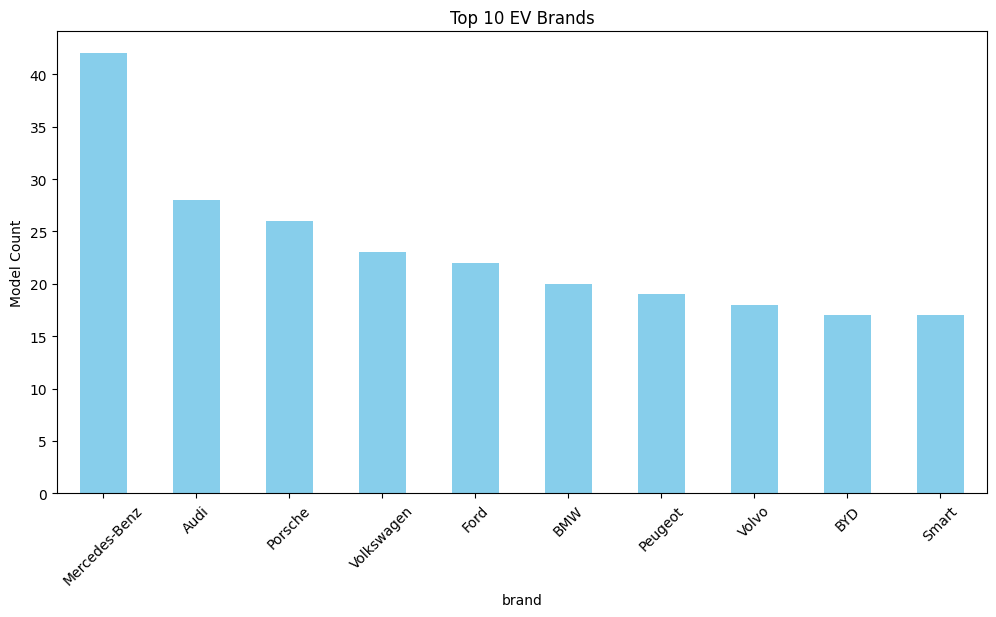

In [8]:
plt.figure(figsize=(12,6))
df['brand'].value_counts().head(10).plot(kind='bar', color='skyblue')
plt.title('Top 10 EV Brands')
plt.ylabel('Model Count')
plt.xticks(rotation=45)
plt.show()


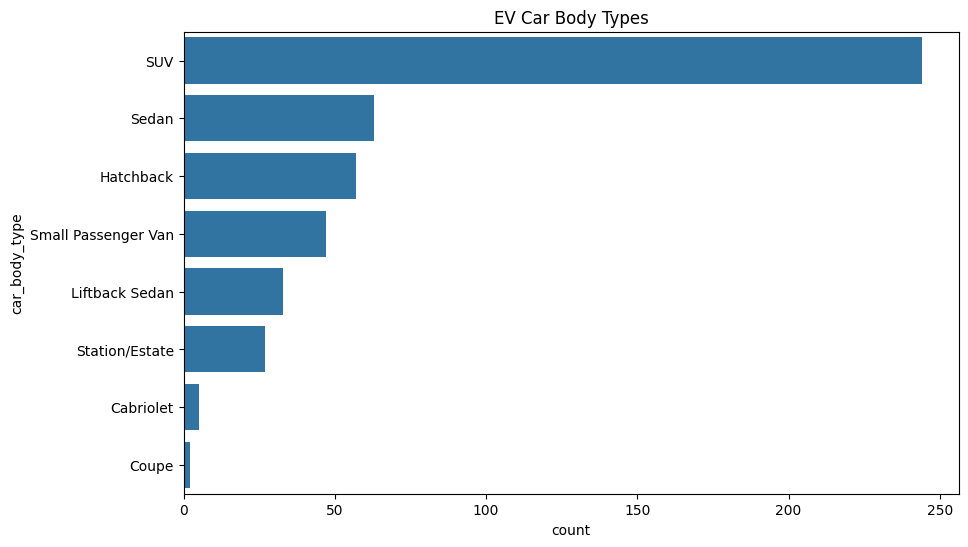

In [9]:
plt.figure(figsize=(10,6))
sns.countplot(y='car_body_type', data=df, order=df['car_body_type'].value_counts().index)
plt.title('EV Car Body Types')
plt.show()

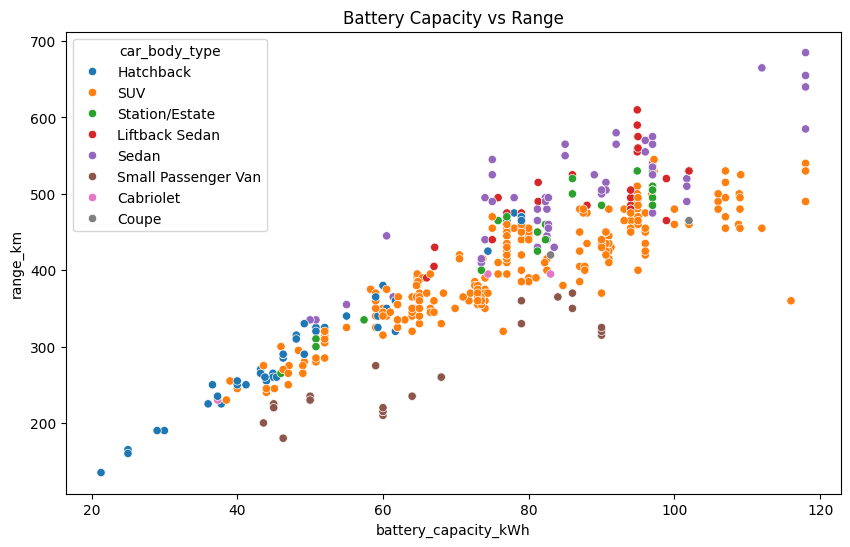

In [10]:
plt.figure(figsize=(10,6))
sns.scatterplot(x='battery_capacity_kWh', y='range_km', hue='car_body_type', data=df)
plt.title('Battery Capacity vs Range')
plt.show()


In [11]:
fig = px.box(df, x='brand', y='range_km', points="all", title='Range by Brand')
fig.update_layout(xaxis={'categoryorder':'total descending'})
fig.show()

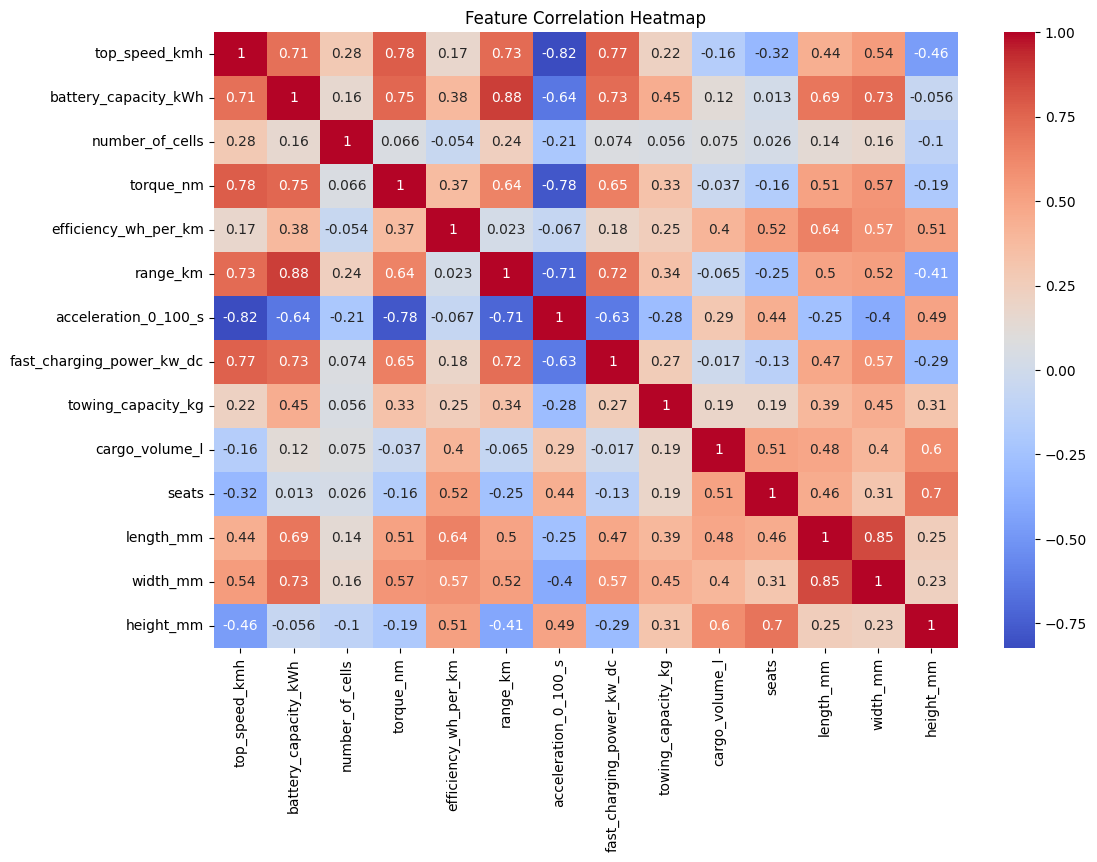

In [12]:
plt.figure(figsize=(12,8))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='coolwarm')
plt.title('Feature Correlation Heatmap')
plt.show()

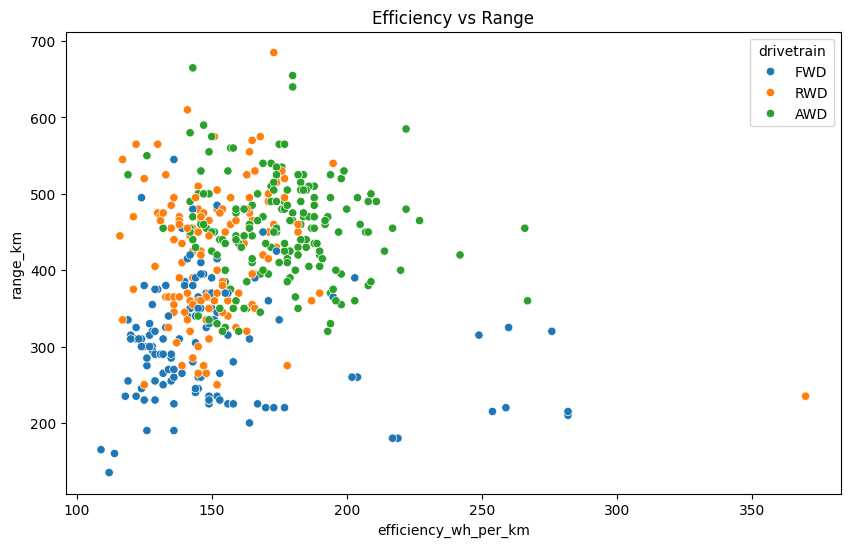

In [13]:
plt.figure(figsize=(10,6))
sns.scatterplot(x='efficiency_wh_per_km', y='range_km', hue='drivetrain', data=df)
plt.title('Efficiency vs Range')
plt.show()

In [14]:
# ML: Predict Range based on Battery & Efficiency
features = ['battery_capacity_kWh', 'efficiency_wh_per_km', 'top_speed_kmh']
target = 'range_km'

X = df[features]
y = df[target]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LinearRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
print("R2 Score for Range Prediction:", r2_score(y_test, y_pred))


R2 Score for Range Prediction: 0.8819858532496083


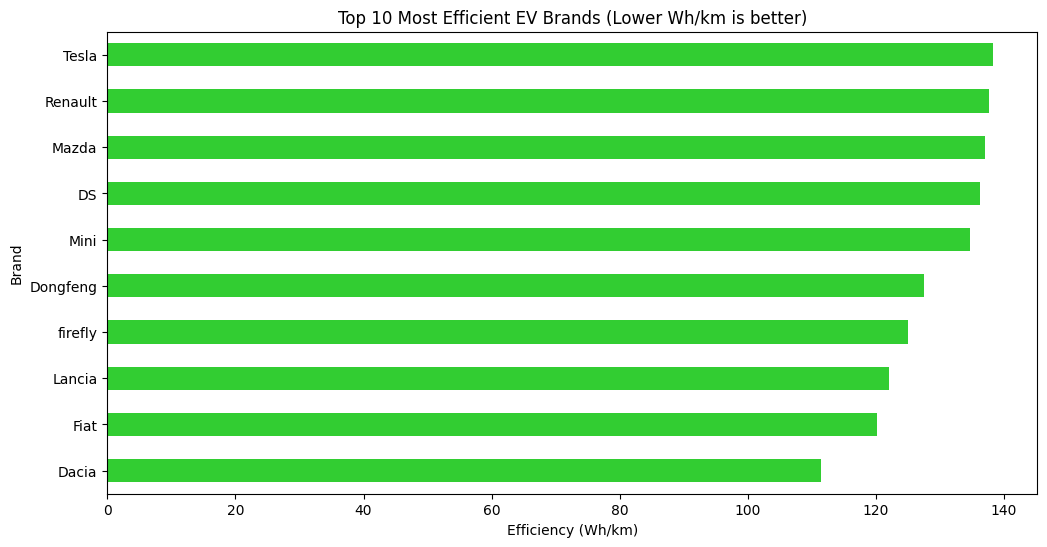

In [17]:
# Calculate average efficiency per brand
brand_efficiency = df.groupby('brand')['efficiency_wh_per_km'].mean().sort_values()
plt.figure(figsize=(12,6))
brand_efficiency.head(10).plot(kind='barh', color='limegreen')
plt.title('Top 10 Most Efficient EV Brands (Lower Wh/km is better)')
plt.xlabel('Efficiency (Wh/km)')
plt.ylabel('Brand')
plt.show()

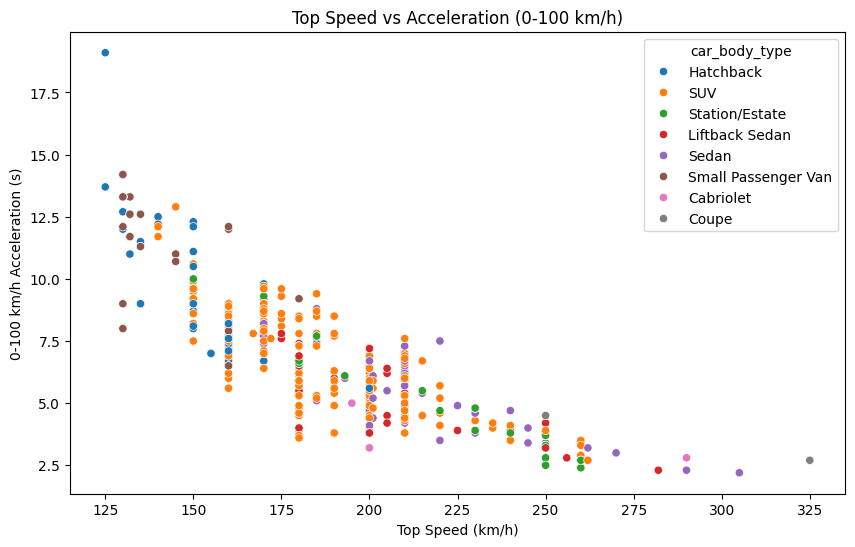

In [18]:
plt.figure(figsize=(10,6))
sns.scatterplot(x='top_speed_kmh', y='acceleration_0_100_s', hue='car_body_type', data=df)
plt.title('Top Speed vs Acceleration (0-100 km/h)')
plt.xlabel('Top Speed (km/h)')
plt.ylabel('0-100 km/h Acceleration (s)')
plt.show()

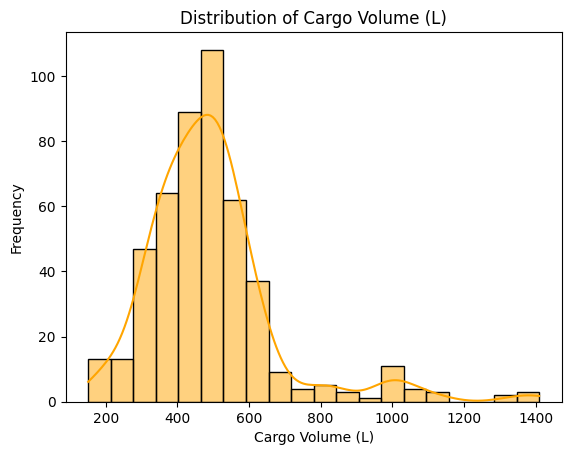

In [19]:

sns.histplot(df['cargo_volume_l'], bins=20, kde=True, color='orange')
plt.title('Distribution of Cargo Volume (L)')
plt.xlabel('Cargo Volume (L)')
plt.ylabel('Frequency')
plt.show()


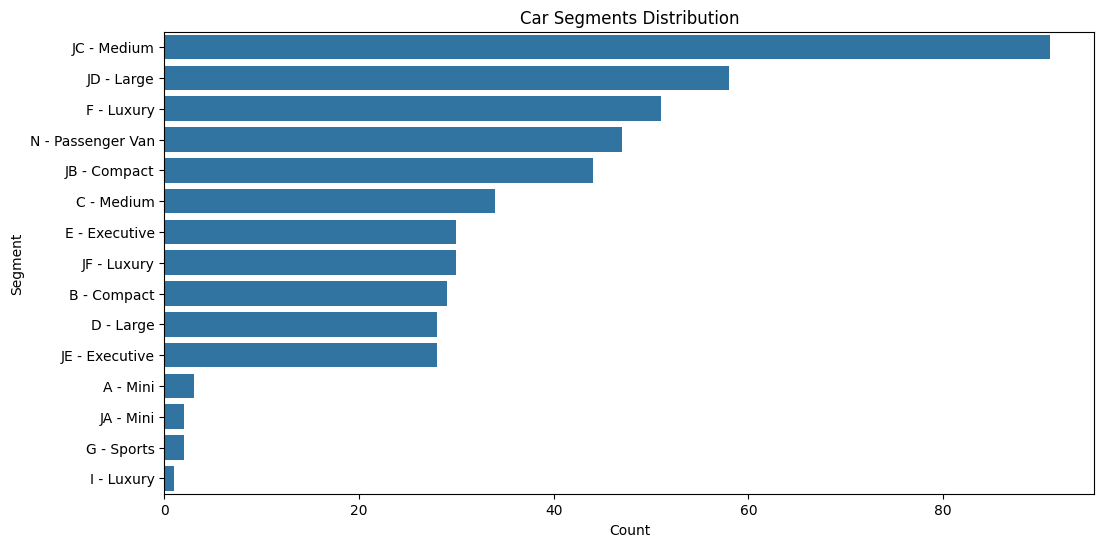

In [21]:
plt.figure(figsize=(12,6))
sns.countplot(y='segment', data=df, order=df['segment'].value_counts().index)
plt.title('Car Segments Distribution')
plt.xlabel('Count')
plt.ylabel('Segment')
plt.show()